In [1]:
import numpy as np
import pandas as pd

exp_7 = pd.read_excel('02 His_Power_GF.xlsx')
exp_7.head()

,Datetime,Power(MW)
0,2022-06-13 \t00:00:00,0.0
1,2022-06-13 \t00:15:00,0.0
2,2022-06-13 \t00:30:00,0.0
3,2022-06-13 \t00:45:00,0.0
4,2022-06-13 \t01:00:00,0.0


d:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


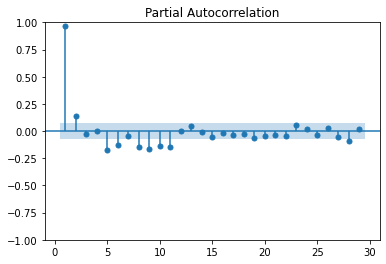

In [2]:
from statsmodels.graphics import tsaplots
from matplotlib import pyplot as plt

tsaplots.plot_pacf(exp_7['Power(MW)'], zero=False)  # zero=False即不画与当前的关系

plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Power(MW)   No. Observations:                  640
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1961.937
Date:                Fri, 26 Aug 2022   AIC                           3933.875
Time:                        10:41:46   BIC                           3956.167
Sample:                             0   HQIC                          3942.529
                                - 640                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1117      0.351     -3.169      0.002      -1.799      -0.424
ar.L2         -0.1824      0.089     -2.048      0.041      -0.357      -0.008
ma.L1         -0.0236      0.349     -0.068      0.946      -0.708       0.661
ma.L2         -0.8320      0.321     -2.593      0.010      -1.461      -0.203
sigma2        27.3510      0.607     45.023      0.000      26.160      28.542
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):              3345.73
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                            -1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

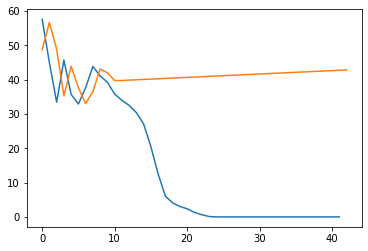

In [3]:
from statsmodels.tsa.arima.model import ARIMA
X = exp_7['Power(MW)'][:640]  # 取前90天为训练集


model = ARIMA(X, order=(2,2,2))
res = model.fit()
# 这里predict有两个参数，start和stop，不传参数默认是预测你训练的值
# 这里我们训练集[0, 90), 测试集[90, 104]
# 此外还有一个forecast方法，只有1个参数即步长steps
# forecast方法就是预测从你结束的那一点往后steps长度的值
preds = res.predict(0, 672)
plt.plot(exp_7['Power(MW)'].values[630:])
plt.plot(preds.values[630:])
res.summary()


C:\Users\曹瑜\AppData\Local\Temp\ipykernel_24948\1149247704.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction = prediction.append(res.forecast(1))
C:\Users\曹瑜\AppData\Local\Temp\ipykernel_24948\1149247704.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction = prediction.append(res.forecast(1))
C:\Users\曹瑜\AppData\Local\Temp\ipykernel_24948\1149247704.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction = prediction.append(res.forecast(1))
C:\Users\曹瑜\AppData\Local\Temp\ipykernel_24948\1149247704.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prediction = prediction.append(res.forecast(1))
C:\U

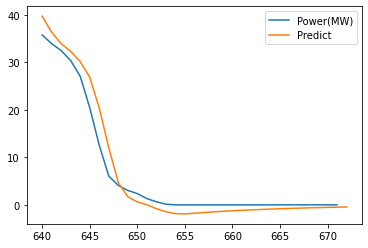

640    39.696627
641    36.310145
642    33.905418
643    32.293801
644    30.129222
645    26.853034
646    20.381768
647    12.039039
648     4.678566
649     1.707473
650     0.607027
651     0.023130
652    -0.816965
653    -1.441616
654    -1.845163
655    -1.910121
656    -1.763047
657    -1.626859
658    -1.483698
659    -1.370626
660    -1.251604
661    -1.156426
662    -1.056606
663    -0.975834
664    -0.891726
665    -0.823226
666    -0.752227
667    -0.694019
668    -0.634091
669    -0.584726
670    -0.534305
671    -0.492508
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.450096
672    -0.4500

In [4]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# 这里的warnings单纯为了过滤不必要的warning，输出结果清爽一些，大家忽略
def rolling_predict_arima(start, end):
    """
    To predict next day and update the model with observation.
    :params start: point start to predict
    :params end: point end to predict
    """
    prediction = exp_7['Power(MW)'][:start]
    for i in range(start, end):
        X = exp_7['Power(MW)'][:i]
        model = ARIMA(X, order=(2, 2, 2))
        res = model.fit()
        prediction = prediction.append(res.forecast(1))
    plt.plot(exp_7['Power(MW)'][start:end], label='Power(MW)')
    plt.plot(prediction[start:end], label='Predict')
    plt.legend()
    plt.show()
    return prediction[start:end]
rolling_predict_arima(640, 700)